<a href="https://colab.research.google.com/github/GuillermoFidalgo/Python-for-STEM-Teachers-Workshop/blob/master/barometer_col_de_la_fausille.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measuring atmospheric pressure

In this exercise we used a Sony XPeria phone's sensors with the [PhyPhox](https://phyphox.org/) application to measure ambient air pressure on a sunny summer day in southern France. We begin our descent from the Jura mountains at Col de la Fausille and end down at a parking lot at CERN's Meyrin site in Switzerland.

In [0]:
# Let's load the relevant python modules.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [0]:
# Load the relevant data.

baro = pd.read_csv("barometri_fausille.csv")

In [0]:
# Take a look at the data.

baro.head()

,Time (s),Pressure (hPa)
0,0.000000,872.580444
1,0.017395,872.660400
2,0.050964,872.870239
3,0.084503,873.020142
4,0.118103,873.110107


In [0]:
# Since the data has only time and pressure, we'll calculate the height difference from known formulas
# and add the values in the dataframe.

maxp = max(baro["Pressure (hPa)"])
dp = list(maxp-baro["Pressure (hPa)"].copy())
baro["Height (m)"] = np.ones(len(baro))

# Since we know our destination is elevated about 440 m from the sea level:

for i in range(0, len(dp)):
    baro["Height (m)"][i] = dp[i]*(10/1.2) + 440

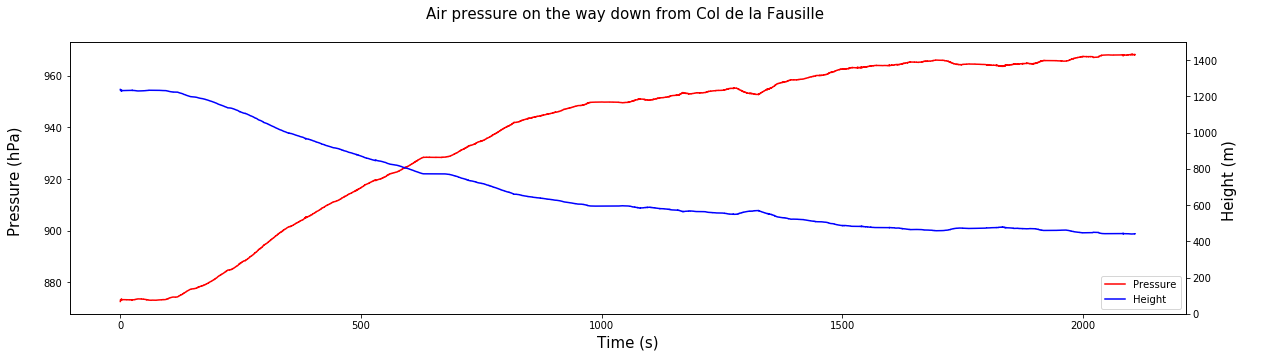

In [0]:
# Here's the plot vs. time. Can you tell where our car stood still?

fig, ax1 = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(5)

eka, = plt.plot(baro["Time (s)"],baro["Pressure (hPa)"], c = 'r', label = 'Pressure')
plt.title("Air pressure on the way down from Col de la Fausille \n", fontsize = 15)
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Pressure (hPa) \n", fontsize = 15)

ax2 = ax1.twinx()
ax2.set_ylabel('Height (m) \n', fontsize = 15)

toka, = plt.plot(baro["Time (s)"], baro["Height (m)"], c = 'b', label = 'Height')

axes=fig.gca()
axes.set_ylim(0,1500)

plt.legend([eka, toka],['Pressure', 'Height'], loc = 'lower right')
plt.show()

In [0]:
# Since time isn't physically very interesting here, let's try the height instead.

plt.figure(figsize = (20,5))

plt.plot(baro["Height (m)"], baro["Pressure (hPa)"])
plt.title("Air pressure \n", fontsize = 15)
plt.xlabel("Height (m)", fontsize = 15)
plt.ylabel("Pressure (hPa) \n", fontsize = 15)

plt.show()